# Lab 7.04 - Time series analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

### Exercise 4 - Airline ticket data

Consider the airline ticket data in the file airline ticket data.csv  

- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

C:\Users\benro\AppData\Local\Temp\ipykernel_13496\4084518144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Tickets
Month,
2018-01-01,605
2018-02-01,647
2018-03-01,636
2018-04-01,612
2018-05-01,714


<Axes: xlabel='Month'>

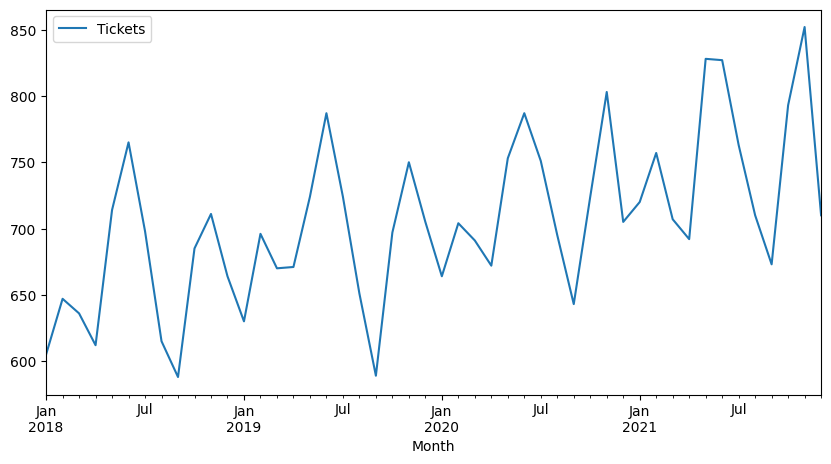

In [3]:
data.plot( y='Tickets', figsize=[10,5])

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data['Tickets']

tickets_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()


In [7]:
data['fittedvalues'] = tickets_hw.fittedvalues
data.head

<bound method NDFrame.head of             Tickets  fittedvalues
Month                            
2018-01-01      605    610.075731
2018-02-01      647    656.325765
2018-03-01      636    631.324635
2018-04-01      612    617.075722
2018-05-01      714    710.074317
2018-06-01      765    746.823947
2018-07-01      698    689.327437
2018-08-01      615    623.075582
2018-09-01      588    578.573670
2018-10-01      685    680.071899
2018-11-01      711    734.319436
2018-12-01      664    651.322458
2019-01-01      630    639.859486
2019-02-01      696    686.109519
2019-03-01      670    661.108390
2019-04-01      671    646.859477
2019-05-01      724    739.858072
2019-06-01      787    776.607702
2019-07-01      724    719.111192
2019-08-01      651    652.859337
2019-09-01      589    608.357425
2019-10-01      697    709.855653
2019-11-01      750    764.103190
2019-12-01      705    681.106212
2020-01-01      664    669.643241
2020-02-01      704    715.893274
2020-03-01      69

<Axes: xlabel='Month'>

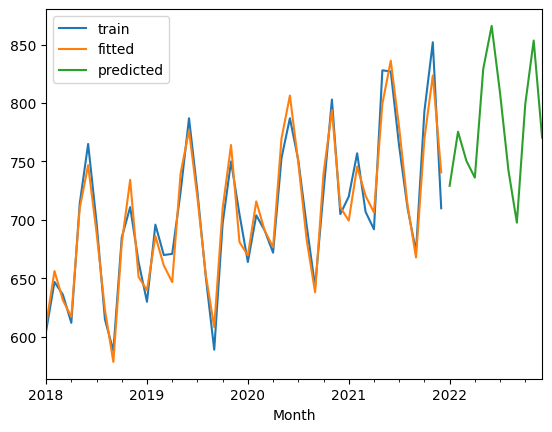

In [8]:
tickets_predicted = tickets_hw.forecast(12)

train.plot(legend=True, label='train')
tickets_hw.fittedvalues.plot(legend=True, label='fitted')

tickets_predicted.plot(legend=True, label='predicted')

## Source
Business Analytics Data Analysis & Decision Making 